In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('sales.csv')

## Analyzing the data

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106




*   Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [24]:
# Extract the day, month, year from the Date column:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [25]:
# Converting the numerical values to categorical values in the day, month, year, holiday flag columns
# Date column
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)
months={
1:'January',
2:'February',
3:'March',
4:'April',
5:'May',
6:'June',
7:'July',
8:'August',
9:'September',
10:'October',
11:'November',
12:'December'}
df['month']= df['month'].map(months)
# Holiday_week column
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,Non-holiday week,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,2010-12-02,1641957.44,Holiday week,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,2010-02-19,1611968.17,Non-holiday week,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,2010-02-26,1409727.59,Non-holiday week,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,2010-05-03,1554806.68,Non-holiday week,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [26]:
df.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151,2010.965035
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885,0.797019
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,2010.000000
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000,2010.000000
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000,2011.000000
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000,2012.000000
max,45.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000,2012.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 553.1+ KB


In [28]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
day             0
month           0
year            0
dtype: int64

## Checking Duplicated Value

In [29]:
df.duplicated().sum()

0

## Fixing Datatype 

In [30]:
#merubah kolom menjadi format Date
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

## Checking Outliers

In [31]:
def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [32]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

### *Count the outliers in the columns of the sales dataframe*

In [33]:
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
Unemployment,481.0,7.47
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05


The above dataframe shows that weekly_sales, holiday_flag, temperature and unemployment columns all have outliers with unemployment having the largest outlier percentage, 7%. Let’s examine the outliers in each column to decide on how to handle them.

In [34]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [35]:
find_outlier_rows(df, 'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
189,2,2010-12-24,3436007.68,Non-holiday week,49.97,2.886,211.064660,8.163,Thursday,December,2010
241,2,2011-12-23,3224369.80,Non-holiday week,46.66,3.112,218.999550,7.441,Thursday,December,2011
471,4,2010-11-26,2789469.45,Holiday week,48.08,2.752,126.669267,7.127,Thursday,November,2010
474,4,2010-12-17,2740057.14,Non-holiday week,46.57,2.884,126.879484,7.127,Thursday,December,2010
475,4,2010-12-24,3526713.39,Non-holiday week,43.21,2.887,126.983581,7.127,Thursday,December,2010
523,4,2011-11-25,3004702.33,Holiday week,47.96,3.225,129.836400,5.143,Thursday,November,2011
526,4,2011-12-16,2771397.17,Non-holiday week,36.44,3.149,129.898065,5.143,Thursday,December,2011
527,4,2011-12-23,3676388.98,Non-holiday week,35.92,3.103,129.984548,5.143,Thursday,December,2011
761,6,2010-12-24,2727575.18,Non-holiday week,55.07,2.886,212.916508,7.007,Thursday,December,2010
1329,10,2010-11-26,2939946.38,Holiday week,55.33,3.162,126.669267,9.003,Thursday,November,2010


### What is the overall trend in sales over time?

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set()

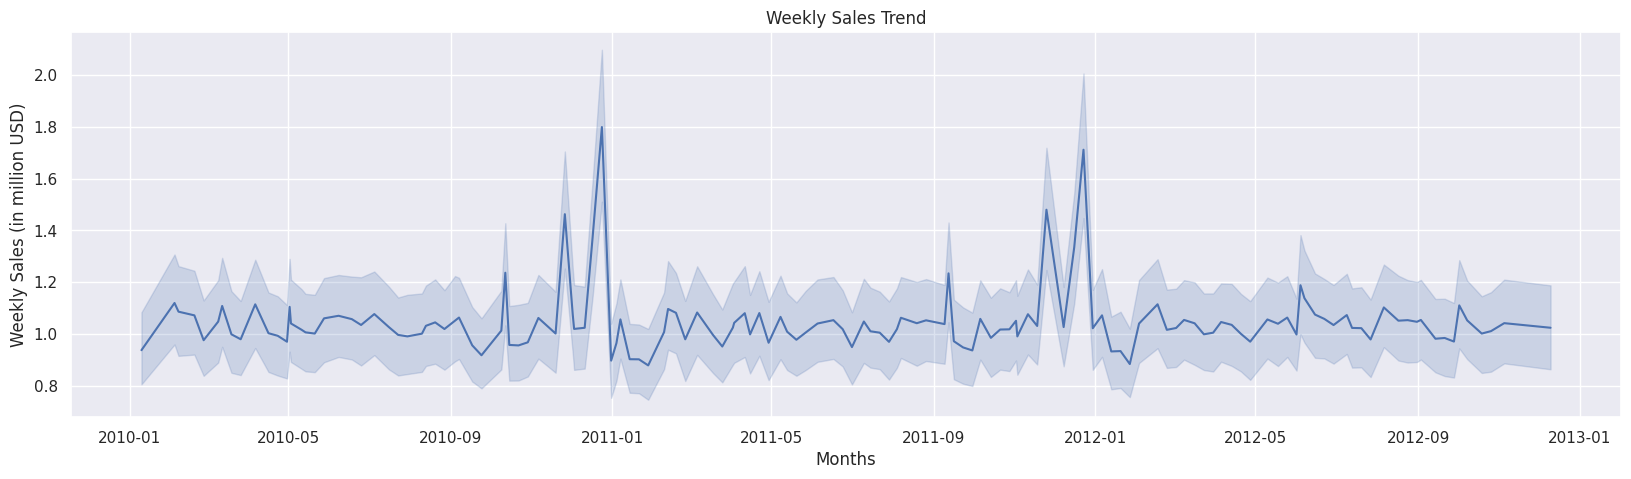

In [37]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))

plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')


plt.show()

In [38]:
sales=df.groupby(['year','month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,year,month,Weekly_Sales
0,2010,April,1.838118e+08
1,2010,August,1.845381e+08
2,2010,December,3.235716e+08
3,2010,February,1.915869e+08
4,2010,January,4.223988e+07
5,2010,July,1.842664e+08
6,2010,June,1.424361e+08
7,2010,March,1.862262e+08
8,2010,May,2.806119e+08
9,2010,November,1.587731e+08


#### Pivot table

In [39]:
pivot_table = df.pivot_table(index='month', columns='year', values='Weekly_Sales', aggfunc='sum')
pivot_table

year,2010,2011,2012
month,,,
April,1.838118e+08,2.789693e+08,1.825428e+08
August,1.845381e+08,1.880810e+08,1.916126e+08
December,3.235716e+08,2.293760e+08,4.612851e+07
February,1.915869e+08,1.876092e+08,1.428296e+08
January,4.223988e+07,2.119657e+08,1.722207e+08
July,1.842664e+08,2.244611e+08,1.845865e+08
June,1.424361e+08,1.401936e+08,2.923883e+08
March,1.862262e+08,1.365205e+08,2.307397e+08
May,2.806119e+08,1.828017e+08,1.422830e+08


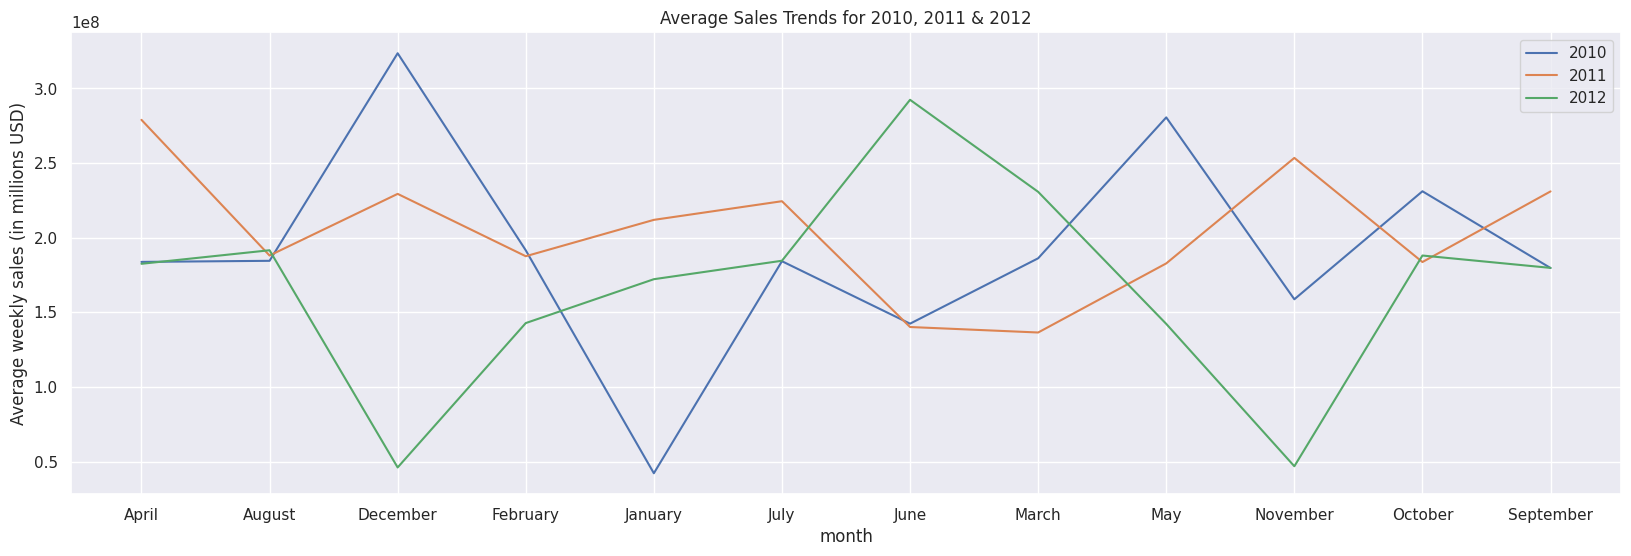

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010], ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011], ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012], ax=ax, label='2012')

plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')

plt.legend()
plt.show()

#### Total monthly sales

In [41]:
df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
month,
April,6.453239e+08
May,6.056966e+08
October,6.029189e+08
December,5.990761e+08
July,5.933139e+08
September,5.905323e+08
June,5.750180e+08
August,5.642317e+08
March,5.534864e+08


The Highest and Lowest Store Revenue

In [65]:
#Highest
df.groupby('Store').agg({'Weekly_Sales': 'sum'}).sort_values(by='Weekly_Sales', ascending=False).head(5)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


In [43]:
#Lowest
df.groupby('Store').agg({'Weekly_Sales': 'sum'}).sort_values(by='Weekly_Sales', ascending=True).head(5)

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42


In [66]:
df[df['Store']==33]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
4576,33,2010-05-02,274593.43,Non-holiday week,58.40,2.962,126.442065,10.115,Saturday,May,2010
4577,33,2010-12-02,294882.83,Holiday week,55.47,2.828,126.496258,10.115,Wednesday,December,2010
4578,33,2010-02-19,296850.83,Non-holiday week,62.16,2.915,126.526286,10.115,Thursday,February,2010
4579,33,2010-02-26,284052.77,Non-holiday week,56.50,2.825,126.552286,10.115,Thursday,February,2010
4580,33,2010-05-03,291484.89,Non-holiday week,59.17,2.877,126.578286,10.115,Sunday,May,2010
...,...,...,...,...,...,...,...,...,...,...,...
4714,33,2012-09-28,242813.51,Non-holiday week,86.42,3.966,131.043000,7.147,Thursday,September,2012
4715,33,2012-05-10,265444.90,Non-holiday week,85.18,4.132,131.075667,6.895,Wednesday,May,2012
4716,33,2012-12-10,291781.15,Non-holiday week,79.64,4.468,131.108333,6.895,Sunday,December,2012
4717,33,2012-10-19,254412.34,Non-holiday week,75.55,4.449,131.149968,6.895,Thursday,October,2012


#### Total daily sales

In [44]:
df.groupby('day')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
day,
Thursday,4.486257e+09
Sunday,5.390133e+08
Wednesday,4.766244e+08
Monday,4.335075e+08
Saturday,4.266091e+08
Friday,2.824947e+08
Tuesday,9.271282e+07


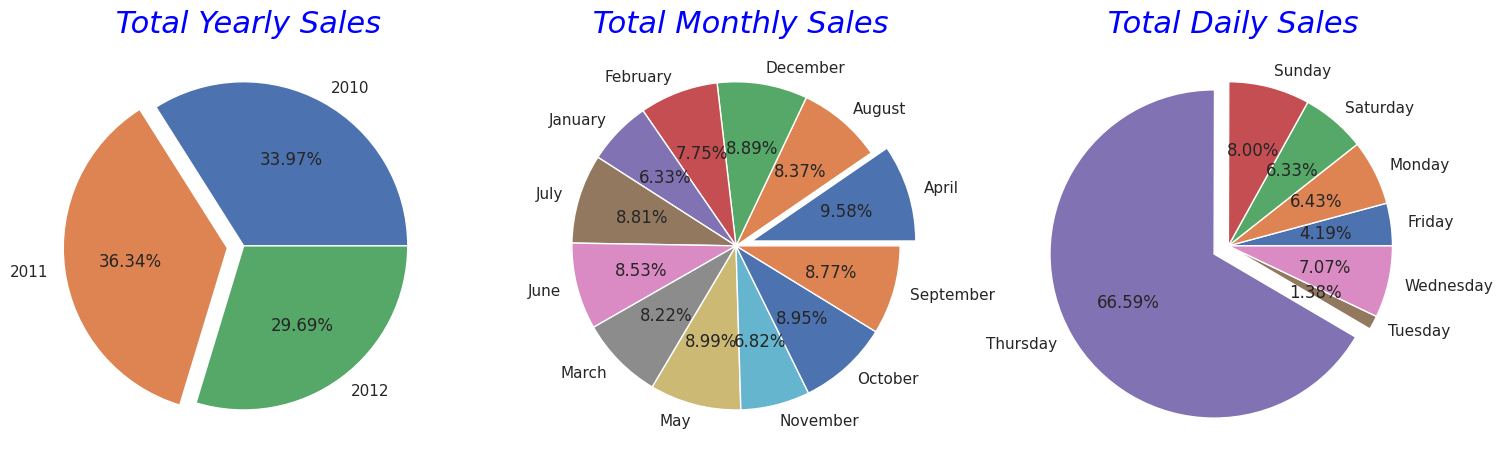

In [45]:
plt.figure(figsize=(18,13)) 
cols=['year','month', 'day']
titles=['Yearly','Monthly', 'Daily']
for i in range(0,len(cols)):
    figure= plt.subplot(1,3,i+1)
    vall = df.groupby(cols[i])['Weekly_Sales'].sum().values
    max_vall=max(vall)
    explode_value = tuple([0 if vall[j] != max_vall else 0.1 for j in range(len(vall))])
    plt.pie(df.groupby(cols[i])['Weekly_Sales'].sum().values, labels=df.groupby(cols[i])['Weekly_Sales'].sum().index, autopct='%.2f%%', explode=explode_value)
    plt.title(f' Total {titles[i]} Sales', color='blue', fontsize= 22, fontstyle='italic')

## Model Building

In [46]:
df_copy = df.copy()

In [47]:
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)

In [48]:
df_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year
0,1,1643690.90,Non-holiday week,42.31,2.572,211.096358,Saturday,May,2010
1,1,1641957.44,Holiday week,38.51,2.548,211.242170,Wednesday,December,2010
2,1,1611968.17,Non-holiday week,39.93,2.514,211.289143,Thursday,February,2010
3,1,1409727.59,Non-holiday week,46.63,2.561,211.319643,Thursday,February,2010
4,1,1554806.68,Non-holiday week,46.50,2.625,211.350143,Sunday,May,2010


### Separating X and y 

In [49]:
X= df_copy.drop(['Weekly_Sales'], axis=1)
y= df_copy['Weekly_Sales']

### Splitting Train and Test Data